## 머신러닝 기반 은행 카드 이탈자 모델링

----

## 머신러닝 기반 카드 고객 이탈자 예측
- 목적
- 데이터 수집
- 데이터 확인 및 시각화
- 데이터 전처리 및 피쳐 엔지니어링
- 모델링
- 테스팅

In [1]:
# 필요한 모듈 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

#그래프 패키지 
import matplotlib.pyplot as plt 
%matplotlib inline 
# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

## 1. 목적
머신러닝 기반 카드 고객 이탈자 예측을 위해 머신러닝 적용

## 2. 데이터 수집

출처 : 케글 [kaggle](https://www.kaggle.com/sakshigoyal7/credit-card-customers)

In [3]:
# 데이터 불러오기
df_org = pd.read_csv("./data/BankChurners.csv")

In [4]:
df_org.shape
df_org.head()
df_org.tail()

(10127, 23)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [5]:
df_org.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
         axis=1, inplace=True)

In [6]:
# 데이터 칼럼 및 결측치 확인
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### 컬럼 내용 확인
- 피쳐 내용 확인 및 서로 상관관계 도출

In [7]:
# 칼럼확인 
df_org.keys()

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [8]:
columns = df_org.keys()

### Data Dicitionary
- 'CLIENTNUM', 
- 'Attrition_Flag'
- 'Customer_Age'
- 'Gender'
- 'Dependent_count' 
- 'Education_Level' 
- 'Marital_Status',
- 'Income_Category' 
- 'Card_Category'
- 'Months_on_book'
- 'Total_Relationship_Count' 
- 'Months_Inactive_12_mon'
- 'Contacts_Count_12_mon' 
- 'Credit_Limit'
- 'Total_Revolving_Bal'
- 'Avg_Open_To_Buy'
- 'Total_Amt_Chng_Q4_Q1'
- 'Total_Trans_Amt'
- 'Total_Trans_Ct' 
- 'Total_Ct_Chng_Q4_Q1' 
- 'Avg_Utilization_Ratio'
- 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'
- 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'

### 결측치 확인
- Education_Level
- Marital_Status
- Income_Category

In [24]:
## 복사
df = df_org.copy()

In [10]:
df['Education_Level'].isnull().sum()
df['Marital_Status'].isnull().sum()
df['Income_Category'].isnull().sum()
# (할당된 데이터) 결측치는 없다는 것을 확인 할 수 있다.

0

0

0

In [25]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [26]:
df['Attrition_Flag'].isnull().sum()
df['Attrition_Flag'].value_counts().sum()

0

10127

### 전처리 전에 데이터 분석을 위한 시각화

In [27]:
def bar_chart(feature):
    stay = df[df['Attrition_Flag']=='Existing Customer'][feature].value_counts()
    leave = df[df['Attrition_Flag']=='Attrited Customer'][feature].value_counts()
    temp = pd.DataFrame([stay,leave])
    temp.index = ['Existing Customer','Attrited Customer']
    temp.plot(kind='bar',stacked=True, figsize=(10,5))
    plt.xticks(rotation=0)

## Education_Level 수준에 따른 고객 이탈자

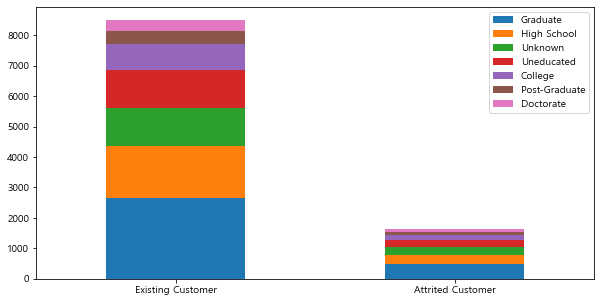

In [28]:
bar_chart('Education_Level')
## unknown 알수 없음
## uneducated 중졸이하
## high school 고졸
## colleage 학사
## graduate / post-graduate 석사
## Docotrate 박사


## 맵핑 작업

In [102]:
### 맵핑 작억
### 숫자로 변경

Education_Level_mapping = {"Unknown": 0, "Uneducated": 1, "High School": 2, 
                           "College": 3, "Graduate": 4, "Post-Graduate": 4, "Doctorate": 5}

df['Education_Level'] = df['Education_Level'].map(Education_Level_mapping)

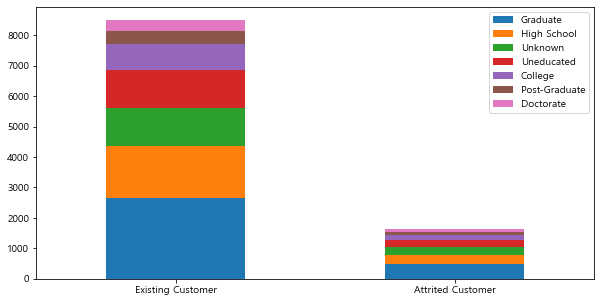

In [88]:
bar_chart('Education_Level')
## unknown 알수 없음
## uneducated 중졸이하
## high school 고졸
## colleage 학사
## graduate / post-graduate 석사
## Docotrate 박사


In [101]:
### 맵핑 작억 (결혼 여부)
### 숫자로 변경

Marital_Status_mapping = {"Unknown": 0, "Married": 1, "Divorced": 2, 
                           "Single": 3}

df['Marital_Status'] = df['Marital_Status'].map(Marital_Status_mapping)

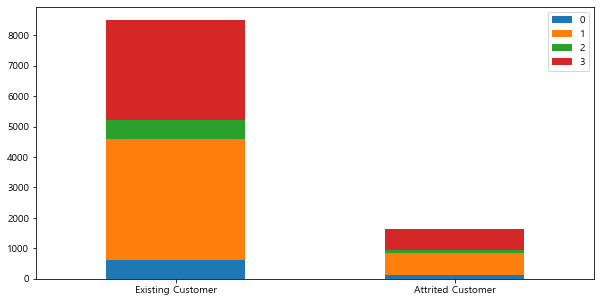

In [32]:
bar_chart('Marital_Status')

In [97]:
### 맵핑 작억 (소드 국간)
### 숫자로 변경

Income_Category_mapping = {"Unknown": 0, "Less than $40K": 1, "$40K - $60K": 2, 
                           "$60K - $80K": 3, "$80K - $120K":4, "$120K +":5}

df['Income_Category'] = df['Income_Category'].map(Income_Category_mapping)

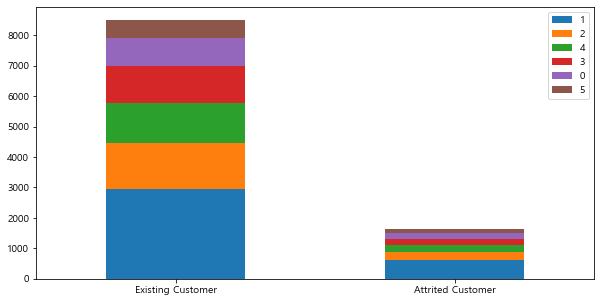

In [98]:
bar_chart('Income_Category')

In [108]:
### 맵핑 작억 (소드 국간)
### 숫자로 변경
Attrition_Flag_mapping = {"Attrited Customer": 0, "Existing Customer": 1}

df['Attrition_Flag'] = df['Attrition_Flag'].map(Attrition_Flag_mapping )

In [95]:
df = df_org.copy()

In [99]:
df['Income_Category'].isnull().sum()

0

In [111]:
## target  값
df.iloc[:,1]

0        1
1        1
2        1
3        1
4        1
        ..
10122    1
10123    0
10124    0
10125    0
10126    0
Name: Attrition_Flag, Length: 10127, dtype: int64

In [103]:
## 내가 사용할 값
df.iloc[:,5:8]

,Education_Level,Marital_Status,Income_Category
0,2,1,3
1,4,3,1
2,4,1,4
3,2,0,1
4,1,1,3
...,...,...,...
10122,4,3,2
10123,0,2,2
10124,2,1,1
10125,4,0,2


In [ ]:
df.iloc[:,5:8]

### 결측치 처리 과정 KNN

In [112]:
from sklearn.impute import KNNImputer

KI = KNNImputer(n_neighbors=51, weights='distance')

In [113]:
# 특징과 라벨 분리
X = df.iloc[:,5:8]
Y = df.iloc[:,1]

In [114]:
# 학습 데이터와 평가 데이터 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y) 

In [115]:
Train_X.isnull().sum() / len(Train_X)

Education_Level    0.0
Marital_Status     0.0
Income_Category    0.0
dtype: float64

In [116]:
Train_X.corr()

,Education_Level,Marital_Status,Income_Category
Education_Level,1.000000,-0.021568,-0.018621
Marital_Status,-0.021568,1.000000,-0.039334
Income_Category,-0.018621,-0.039334,1.000000


#### 피쳐간에 유의미한 상관관계가 없음

In [117]:
#### 추가 희진님 요구사항
# 특징과 라벨 분리
X = df.drop('Attrition_Flag', axis = 1)
Y = df.iloc[:,1]

In [118]:
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y) 

In [119]:
Train_X.isnull().sum() / len(Train_X)

CLIENTNUM                   0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

In [120]:
Train_X.corr()

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.019118,0.002802,-0.004598,-0.000736,0.022606,0.145374,0.006972,0.008371,0.006444,0.008993,-0.001406,0.009125,0.024184,-0.017397,0.002681,0.006976,-0.004201
Customer_Age,0.019118,1.000000,-0.124068,-0.002646,-0.018900,0.023731,0.791779,-0.011437,0.051168,-0.024390,-0.002063,0.020097,-0.003878,-0.057152,-0.046975,-0.067837,-0.005979,0.013543
Dependent_count,0.002802,-0.124068,1.000000,-0.005925,-0.049344,0.064664,-0.106585,-0.042840,-0.016578,-0.036374,0.064536,-0.005831,0.065094,-0.031032,0.027237,0.053914,0.004309,-0.036350
Education_Level,-0.004598,-0.002646,-0.005925,1.000000,-0.015739,-0.009631,0.006604,-0.000736,0.003704,-0.006408,-0.011563,-0.017153,-0.010021,-0.019821,-0.010844,-0.004189,-0.015107,-0.004034
Marital_Status,-0.000736,-0.018900,-0.049344,-0.015739,1.000000,-0.031985,-0.011140,-0.013786,0.010403,-0.002495,0.031125,-0.024250,0.033329,-0.025921,0.044203,0.095830,-0.010642,-0.023656
Income_Category,0.022606,0.023731,0.064664,-0.009631,-0.031985,1.000000,0.019631,0.006627,-0.028094,0.018379,0.477664,0.033015,0.474919,0.013500,0.011112,-0.061937,-0.008581,-0.253337
Months_on_book,0.145374,0.791779,-0.106585,0.006604,-0.011140,0.019631,1.000000,-0.009113,0.073752,-0.014760,-0.004042,0.011459,-0.005078,-0.043825,-0.039869,-0.050956,-0.007710,-0.001887
Total_Relationship_Count,0.006972,-0.011437,-0.042840,-0.000736,-0.013786,0.006627,-0.009113,1.000000,0.009708,0.041280,-0.073437,0.012085,-0.074564,0.052629,-0.354099,-0.248628,0.044521,0.078311
Months_Inactive_12_mon,0.008371,0.051168,-0.016578,0.003704,0.010403,-0.028094,0.073752,0.009708,1.000000,0.034703,-0.027566,-0.041041,-0.023876,-0.028282,-0.049188,-0.055830,-0.047295,-0.006132
Contacts_Count_12_mon,0.006444,-0.024390,-0.036374,-0.006408,-0.002495,0.018379,-0.014760,0.041280,0.034703,1.000000,0.013021,-0.055776,0.018061,-0.022480,-0.111480,-0.155750,-0.105709,-0.051279


In [149]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,M,3,2,1,3,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,F,5,4,3,1,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,M,3,4,1,4,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,F,4,2,0,1,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,M,3,1,1,3,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### 카드 인코딩

In [216]:
df["Card_Category"].value_counts()
df["Card_Category"].replace({"Gold":2,
                                 "Silver":1,
                                 
                                 "Blue":0,
                                 "Platinum":3,
                                 
                                 },inplace=True)

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [219]:
df["Gender"].value_counts()
df["Gender"].replace({"F":1, "M":0},inplace=True)

F    5358
M    4769
Name: Gender, dtype: int64

In [227]:
len(df["Gender"])

10127

## 스피어 상관계수 구하기 (요구사항)

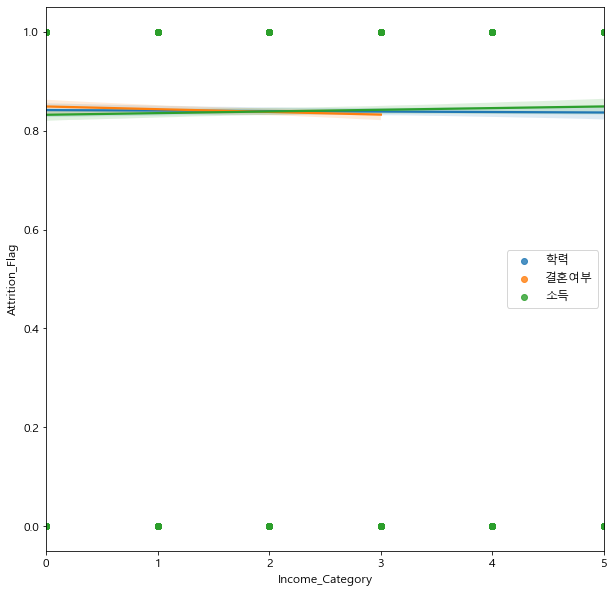

In [178]:
#산점도 + 회귀직선 비교

fig = plt.figure(figsize = [10,10])


ax = sns.regplot(x='Education_Level',y='Attrition_Flag',data=df,label='학력')
ax = sns.regplot(x='Marital_Status',y='Attrition_Flag',data=df,label='결혼여부')
ax = sns.regplot(x='Income_Category',y='Attrition_Flag',data=df,label='소득')

ax.legend(loc='right')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

0        1
1        1
2        1
3        1
4        1
        ..
10122    1
10123    0
10124    0
10125    0
10126    0
Name: Attrition_Flag, Length: 10127, dtype: int64

0        2
1        4
2        4
3        2
4        1
        ..
10122    4
10123    0
10124    2
10125    4
10126    4
Name: Education_Level, Length: 10127, dtype: int64

0        1
1        3
2        1
3        0
4        1
        ..
10122    3
10123    2
10124    1
10125    0
10126    1
Name: Marital_Status, Length: 10127, dtype: int64

0        3
1        1
2        4
3        1
4        3
        ..
10122    2
10123    2
10124    1
10125    2
10126    1
Name: Income_Category, Length: 10127, dtype: int64

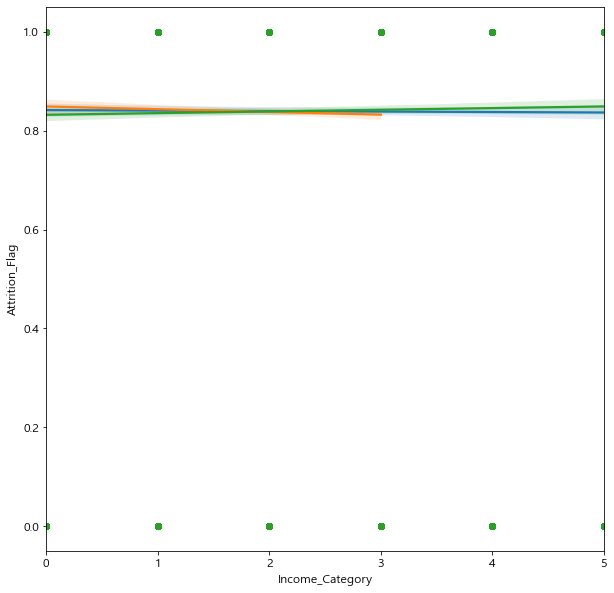

In [179]:
ax = sns.regplot(x='Education_Level',y='Attrition_Flag',data=df,label='학력')
ax = sns.regplot(x='Marital_Status',y='Attrition_Flag',data=df,label='결혼여부')
ax = sns.regplot(x='Income_Category',y='Attrition_Flag',data=df,label='소득')


df['Attrition_Flag']

df['Education_Level']
df['Marital_Status']
df['Income_Category']


Text(0, 0.5, '수치')

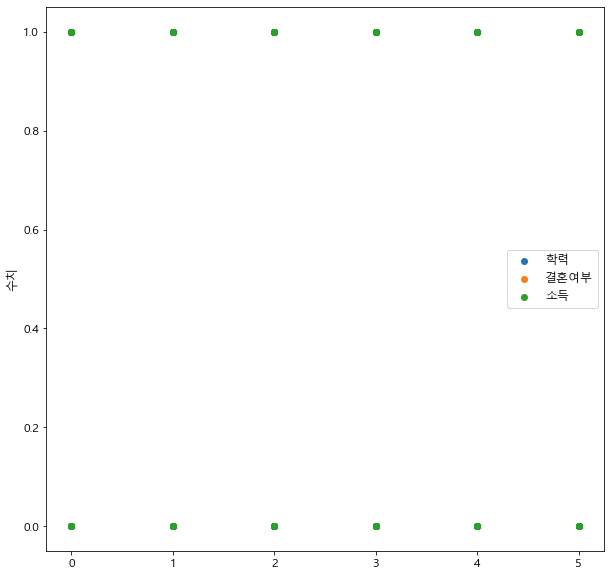

In [180]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12

plt.scatter(df['Education_Level'], df['Attrition_Flag'], label='학력')
plt.scatter(df['Marital_Status'], df['Attrition_Flag'], label='결혼여부')
plt.scatter(df['Income_Category'], df['Attrition_Flag'],label='소득')

plt.ylabel('수치')
plt.legend(loc='best')

In [164]:
df[['Education_Level','Marital_Status','Income_Category','Attrition_Flag']]

,Education_Level,Marital_Status,Income_Category,Attrition_Flag
0,2,1,3,1
1,4,3,1,1
2,4,1,4,1
3,2,0,1,1
4,1,1,3,1
...,...,...,...,...
10122,4,3,2,1
10123,0,2,2,0
10124,2,1,1,0
10125,4,0,2,0


array([[<AxesSubplot:xlabel='Education_Level', ylabel='Education_Level'>,
        <AxesSubplot:xlabel='Marital_Status', ylabel='Education_Level'>,
        <AxesSubplot:xlabel='Income_Category', ylabel='Education_Level'>,
        <AxesSubplot:xlabel='Attrition_Flag', ylabel='Education_Level'>],
       [<AxesSubplot:xlabel='Education_Level', ylabel='Marital_Status'>,
        <AxesSubplot:xlabel='Marital_Status', ylabel='Marital_Status'>,
        <AxesSubplot:xlabel='Income_Category', ylabel='Marital_Status'>,
        <AxesSubplot:xlabel='Attrition_Flag', ylabel='Marital_Status'>],
       [<AxesSubplot:xlabel='Education_Level', ylabel='Income_Category'>,
        <AxesSubplot:xlabel='Marital_Status', ylabel='Income_Category'>,
        <AxesSubplot:xlabel='Income_Category', ylabel='Income_Category'>,
        <AxesSubplot:xlabel='Attrition_Flag', ylabel='Income_Category'>],
       [<AxesSubplot:xlabel='Education_Level', ylabel='Attrition_Flag'>,
        <AxesSubplot:xlabel='Marital_Status', 

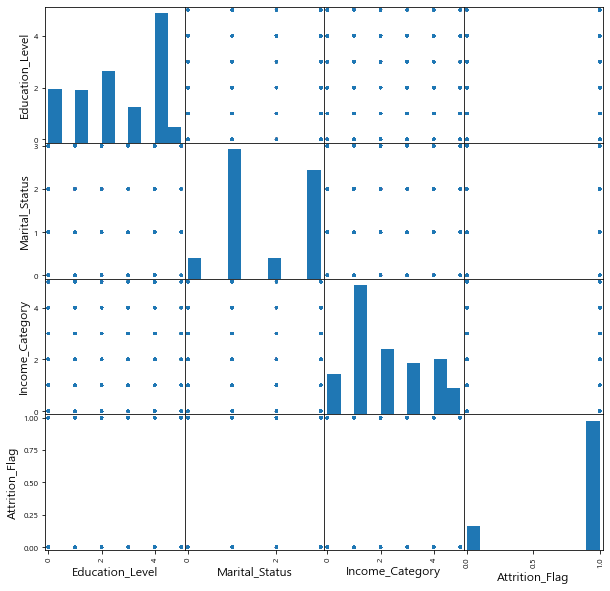

In [181]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
pd.plotting.scatter_matrix(df[['Education_Level','Marital_Status','Income_Category','Attrition_Flag']])

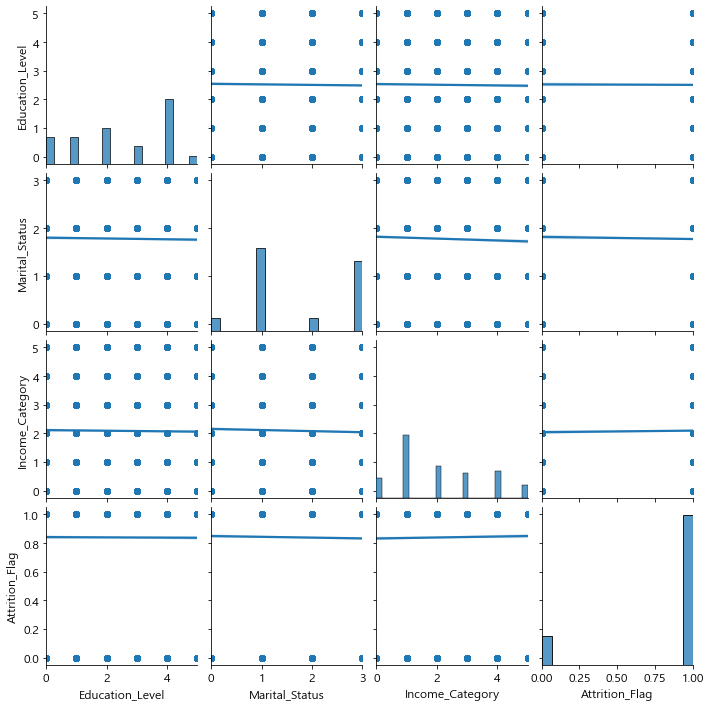

In [182]:
sns.pairplot(df[['Education_Level','Marital_Status','Income_Category','Attrition_Flag']],kind='reg')

In [183]:
from scipy.stats import *
np.set_printoptions(precision=6, suppress=True)

In [184]:
temp = ['Education_Level','Marital_Status','Income_Category','Attrition_Flag']


for cnt1 in temp:
    print(cnt1, ' 상관계수')
    print(' ----------------------------------')
    
    for cnt2 in temp:
        print(cnt1,'와 ', cnt2, ' 상관계수 입니다')
        pearsonr(df[cnt1],df[cnt2])
    
     
    



Education_Level  상관계수
 ----------------------------------
Education_Level 와  Education_Level  상관계수 입니다


(1.0, 0.0)

Education_Level 와  Marital_Status  상관계수 입니다


(-0.012355646219143793, 0.21376479172749718)

Education_Level 와  Income_Category  상관계수 입니다


(-0.011366404083358152, 0.25273519155124585)

Education_Level 와  Attrition_Flag  상관계수 입니다


(-0.004135643887137306, 0.6773129445071066)

Marital_Status  상관계수
 ----------------------------------
Marital_Status 와  Education_Level  상관계수 입니다


(-0.012355646219143793, 0.21376479172749718)

Marital_Status 와  Marital_Status  상관계수 입니다


(0.999999999999999, 0.0)

Marital_Status 와  Income_Category  상관계수 입니다


(-0.02752107765403996, 0.005610601340089117)

Marital_Status 와  Attrition_Flag  상관계수 입니다


(-0.015697840025545442, 0.11419322810277138)

Income_Category  상관계수
 ----------------------------------
Income_Category 와  Education_Level  상관계수 입니다


(-0.011366404083358152, 0.25273519155124585)

Income_Category 와  Marital_Status  상관계수 입니다


(-0.02752107765403996, 0.005610601340089117)

Income_Category 와  Income_Category  상관계수 입니다


(0.9999999999999998, 0.0)

Income_Category 와  Attrition_Flag  상관계수 입니다


(0.013577256438983725, 0.17187170742442368)

Attrition_Flag  상관계수
 ----------------------------------
Attrition_Flag 와  Education_Level  상관계수 입니다


(-0.004135643887137306, 0.6773129445071066)

Attrition_Flag 와  Marital_Status  상관계수 입니다


(-0.015697840025545442, 0.11419322810277138)

Attrition_Flag 와  Income_Category  상관계수 입니다


(0.013577256438983725, 0.17187170742442368)

Attrition_Flag 와  Attrition_Flag  상관계수 입니다


(0.9999999999999989, 0.0)

In [185]:
df_temp = df[['Education_Level','Marital_Status','Income_Category','Attrition_Flag']].copy()

<Figure size 864x720 with 0 Axes>

<AxesSubplot:>

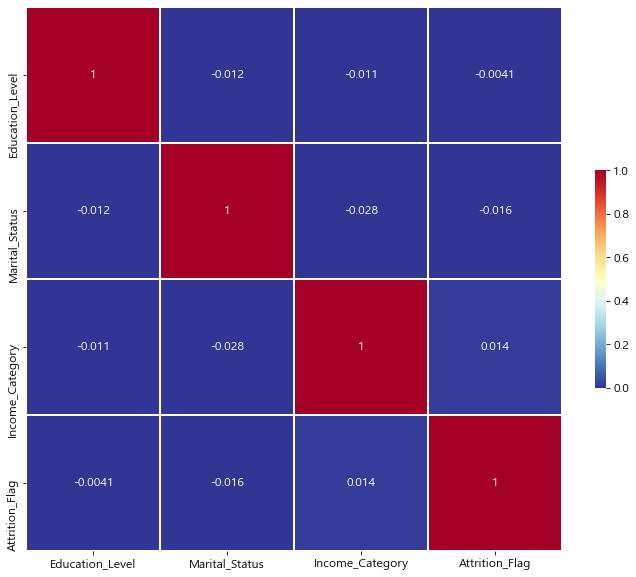

In [186]:
mat = np.zeros_like(df_temp.corr(method = 'pearson'))
plt.figure(figsize=(12,10))
sns.heatmap(df_temp .corr(method = 'pearson'),
            vmin = 0, vmax = +1, 
            annot = True, 
            cmap = 'RdYlBu_r', 
            linewidths=1,
            cbar_kws={"shrink": 0.4},
            mask = mat)

### 범주형 여부로 분리후 상관계수 확인

In [187]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [223]:
temp_float = df[['Customer_Age', 'Gender',
               'Dependent_count', 'Months_on_book',
               'Total_Relationship_Count', 'Months_Inactive_12_mon',
               'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
               'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
               'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']].copy()

In [222]:
temp_str = df[['Gender','Education_Level', 'Marital_Status','Income_Category', 'Card_Category',]].copy()

In [224]:
temp_str.head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,0,2,1,3,0
1,1,4,3,1,0
2,0,4,1,4,0
3,1,2,0,1,0
4,0,1,1,3,0


### pearson로 float 형태

<Figure size 2160x2160 with 0 Axes>

<AxesSubplot:>

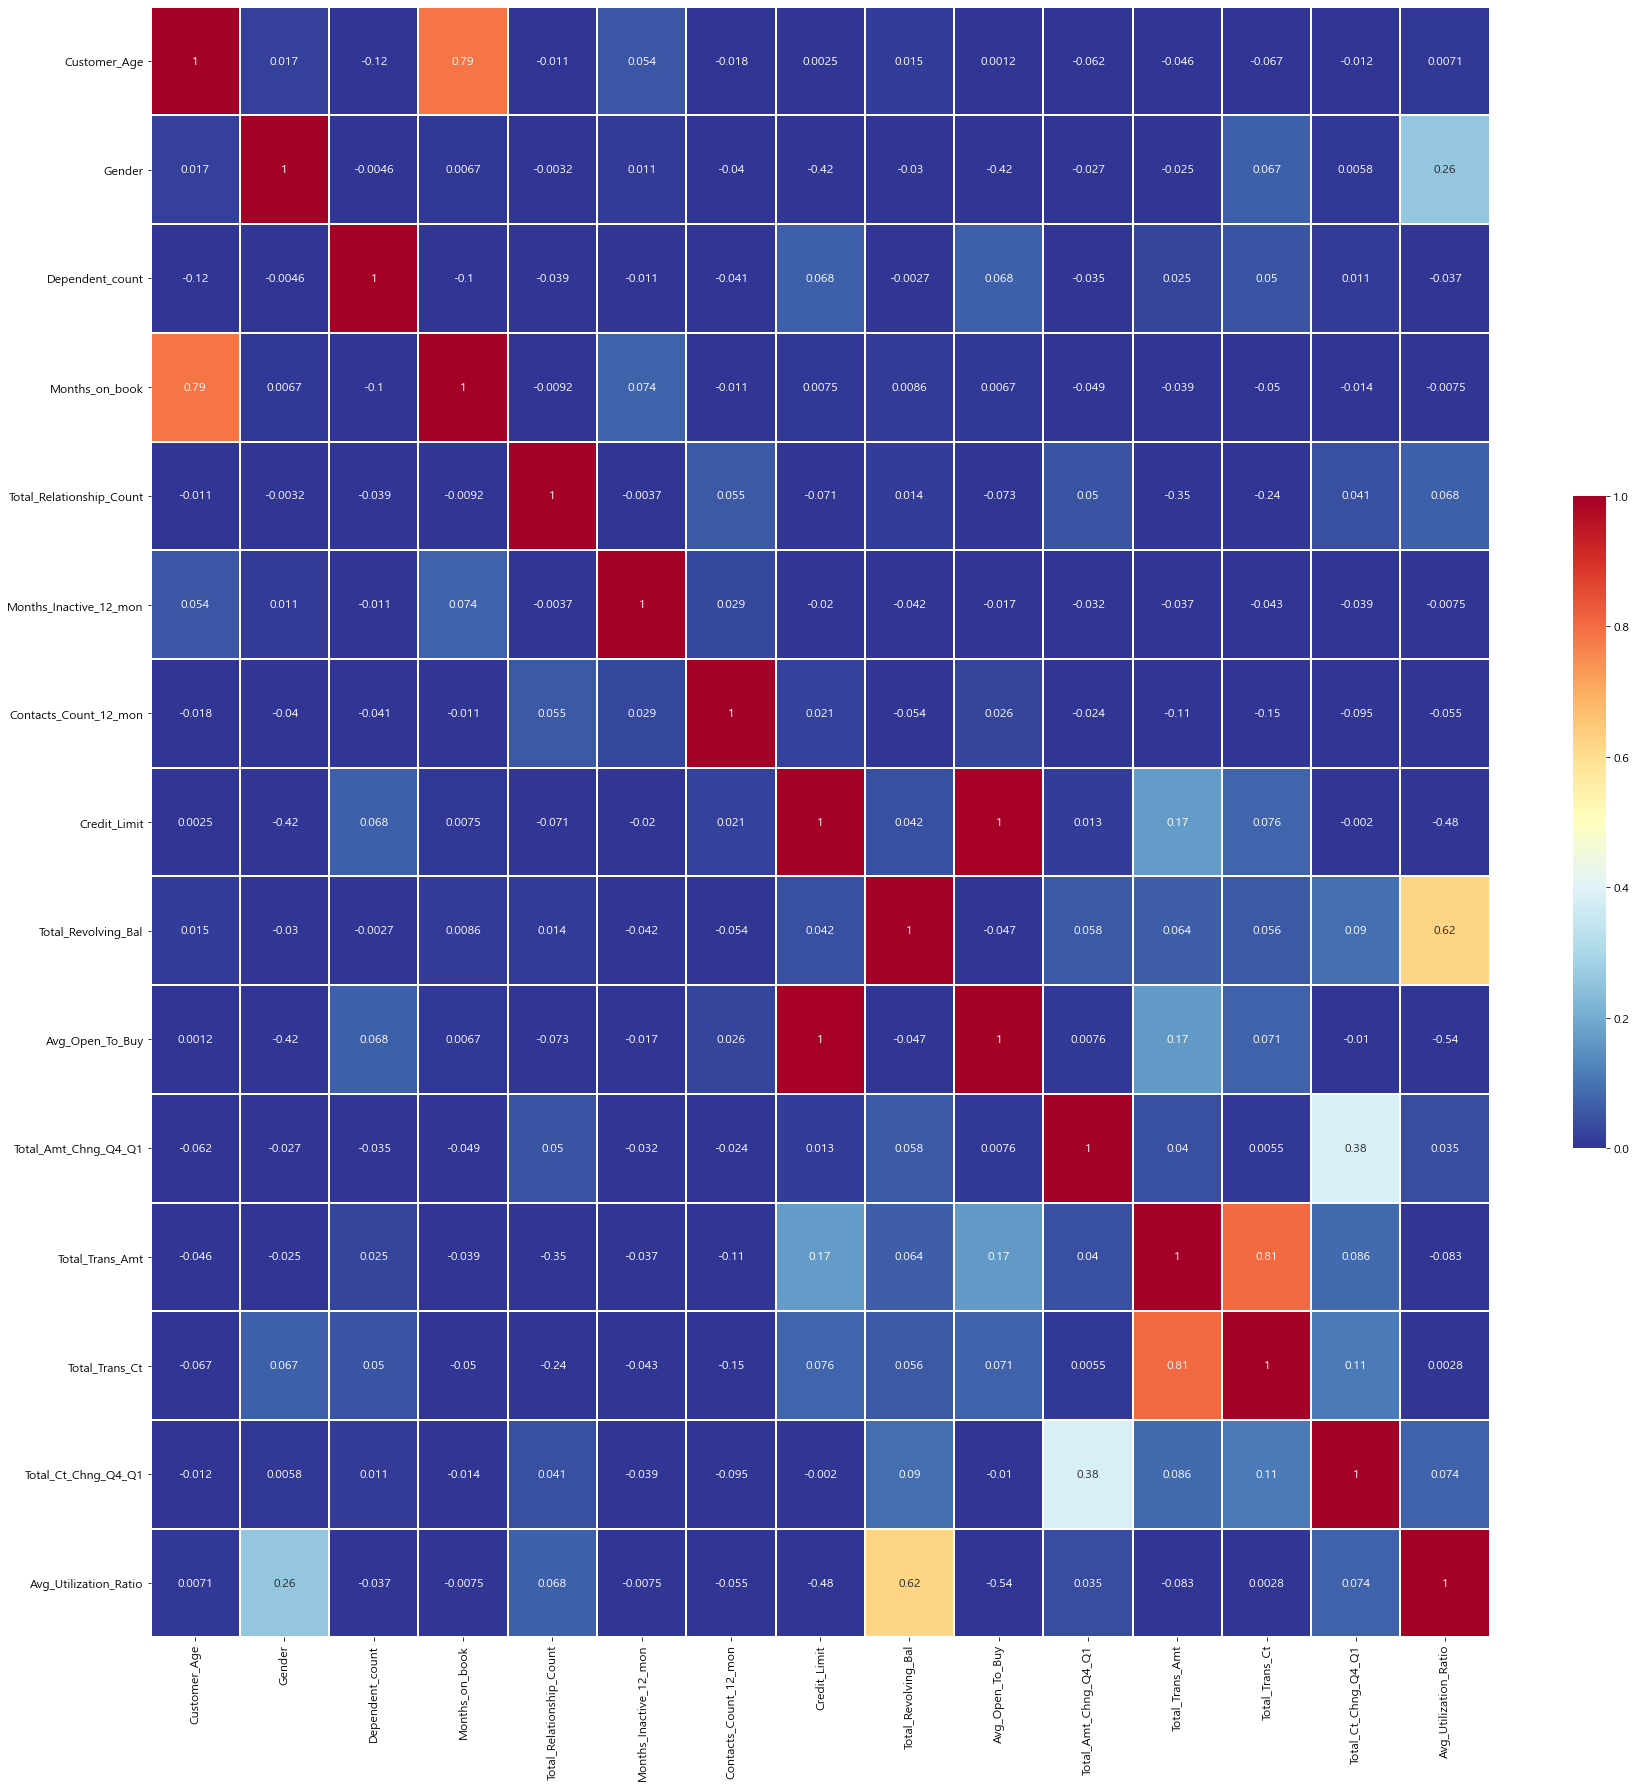

In [225]:
mat = np.zeros_like(temp_float.corr(method = 'pearson'))
plt.figure(figsize=(30,30))
sns.heatmap(temp_float.corr(method = 'pearson'),
            vmin = 0, vmax = +1, 
            annot = True, 
            cmap = 'RdYlBu_r', 
            linewidths=1,
            cbar_kws={"shrink": 0.4},
            mask = mat)

<Figure size 720x720 with 0 Axes>

<AxesSubplot:>

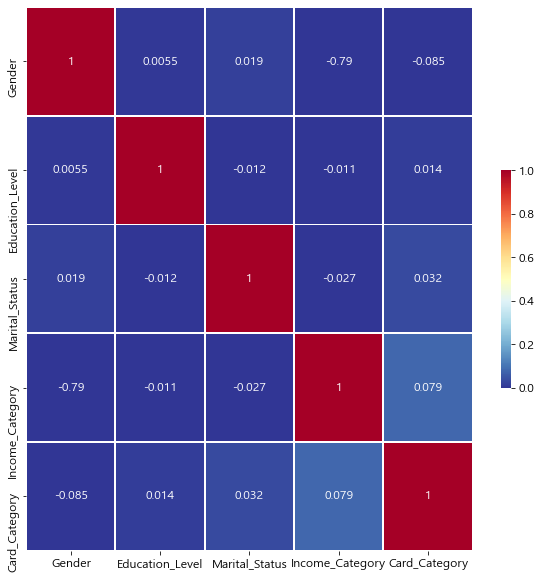

In [226]:
mat = np.zeros_like(temp_str.corr(method = 'spearman'))
plt.figure(figsize=(10,10))
sns.heatmap(temp_str.corr(method = 'spearman'),
            vmin = 0, vmax = +1, 
            annot = True, 
            cmap = 'RdYlBu_r', 
            linewidths=1,
            cbar_kws={"shrink": 0.4},
            mask = mat)

#### 남자/여자 소득구간 카운트

In [255]:
cnt = df[['Education_Level','Gender','Income_Category']].groupby(['Gender', 'Income_Category'])
cnt.count()

Education_Level
Gender Income_Category                 
0      0                             52
       1                            277
       2                            776
       3                           1402
       4                           1535
       5                            727
1      0                           1060
       1                           3284
       2                           1014

In [257]:
cnt = df[['Education_Level','Gender','Income_Category']].groupby(['Education_Level','Income_Category'])
cnt.count()

Gender
Education_Level Income_Category        
0               0                   145
                1                   556
                2                   269
                3                   210
                4                   219
                5                   120
1               0                   185
                1                   522
                2                   249
                3                   195
                4                   217
                5                   119
2               0                   225
                1                   671
                2                   355
                3                   307
                4                   308
                5                   147
3               0                   108
                1                   345
                2                   183
                3                   132
                4                   175
                5                    70
4               0                   379
                1                  1309
                2                   664
                3                   499
                4                   559
                5                   234
5               0                    70
                1                   158
                2                    70
                3                    59
                4                    57
                5                    37

Gender  Education_Level
0       0                   707
        1                   691
        2                   985
        3                   481
        4                  1711
        5                   194
1       0                   812
        1                   796
        2                  1028
        3                   532
        4                  1933
        5                   257
Name: CLIENTNUM, dtype: int64

<AxesSubplot:xlabel='Gender,Education_Level'>

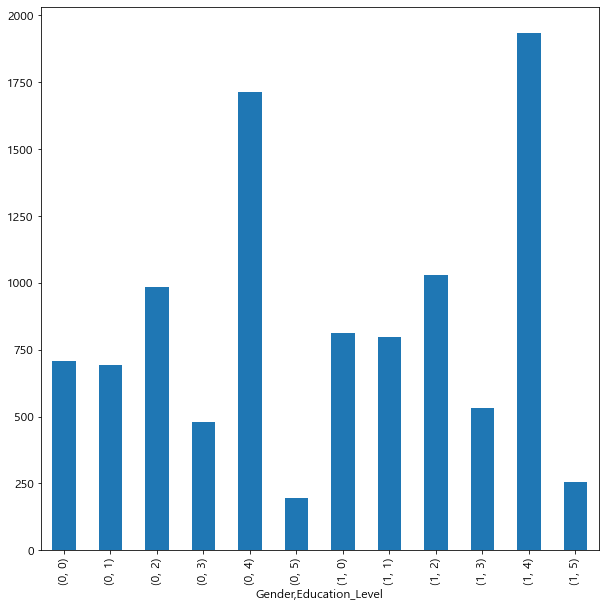

In [254]:
df_piv = df.groupby(['Gender','Education_Level']).count()["CLIENTNUM"]
df_piv

df_piv.plot(kind = 'bar')


<AxesSubplot:xlabel='Gender', ylabel='Income_Category'>

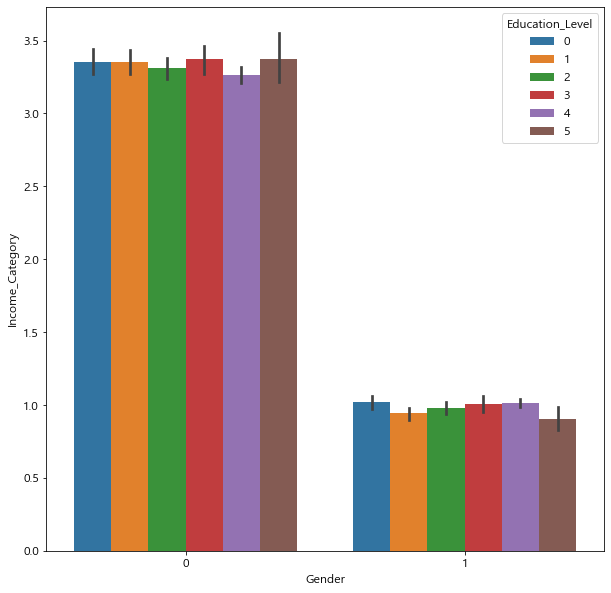

In [253]:
sns.barplot(x=df['Gender'], y=df['Income_Category'], hue=df['Education_Level'], data=df)

In [233]:
cnt = df.groupby(['Gender', 'Income_Category'])
cnt.count()

CLIENTNUM  Attrition_Flag  Customer_Age  \
Gender Income_Category                                            
0      0                       52              52            52   
       1                      277             277           277   
       2                      776             776           776   
       3                     1402            1402          1402   
       4                     1535            1535          1535   
       5                      727             727           727   
1      0                     1060            1060          1060   
       1                     3284            3284          3284   
       2                     1014            1014          1014   

                        Dependent_count  Education_Level  Marital_Status  \
Gender Income_Category                                                     
0      0                             52               52              52   
       1                            277              277             277   
       2                            776              776             776   
       3                           1402             1402            1402   
       4                           1535             1535            1535   
       5                            727              727             727   
1      0                           1060             1060            1060   
       1                           3284             3284            3284   
       2                           1014             1014            1014   

                        Card_Category  Months_on_book  \
Gender Income_Category                                  
0      0                           52              52   
       1                          277             277   
       2                          776             776   
       3                         1402            1402   
       4                         1535            1535   
       5                          727             727   
1      0                         1060            1060   
       1                         3284            3284   
       2                         1014            1014   

                        Total_Relationship_Count  Months_Inactive_12_mon  \
Gender Income_Category                                                     
0      0                                      52                      52   
       1                                     277                     277   
       2                                     776                     776   
       3                                    1402                    1402   
       4                                    1535                    1535   
       5                                     727                     727   
1      0                                    1060                    1060   
       1                                    3284                    3284   
       2                                    1014                    1014   

                        Contacts_Count_12_mon  Credit_Limit  \
Gender Income_Category                                        
0      0                                   52            52   
       1                                  277           277   
       2                                  776           776   
       3                                 1402          1402   
       4                                 1535          1535   
       5                                  727           727   
1      0                                 1060          1060   
       1                                 3284          3284   
       2                                 1014          1014   

                        Total_Revolving_Bal  Avg_Open_To_Buy  \
Gender Income_Category                                         
0      0                                 52               52   
       1                                277              277   
       2                          

In [197]:
temp = ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

<Figure size 2160x2160 with 0 Axes>

<AxesSubplot:>

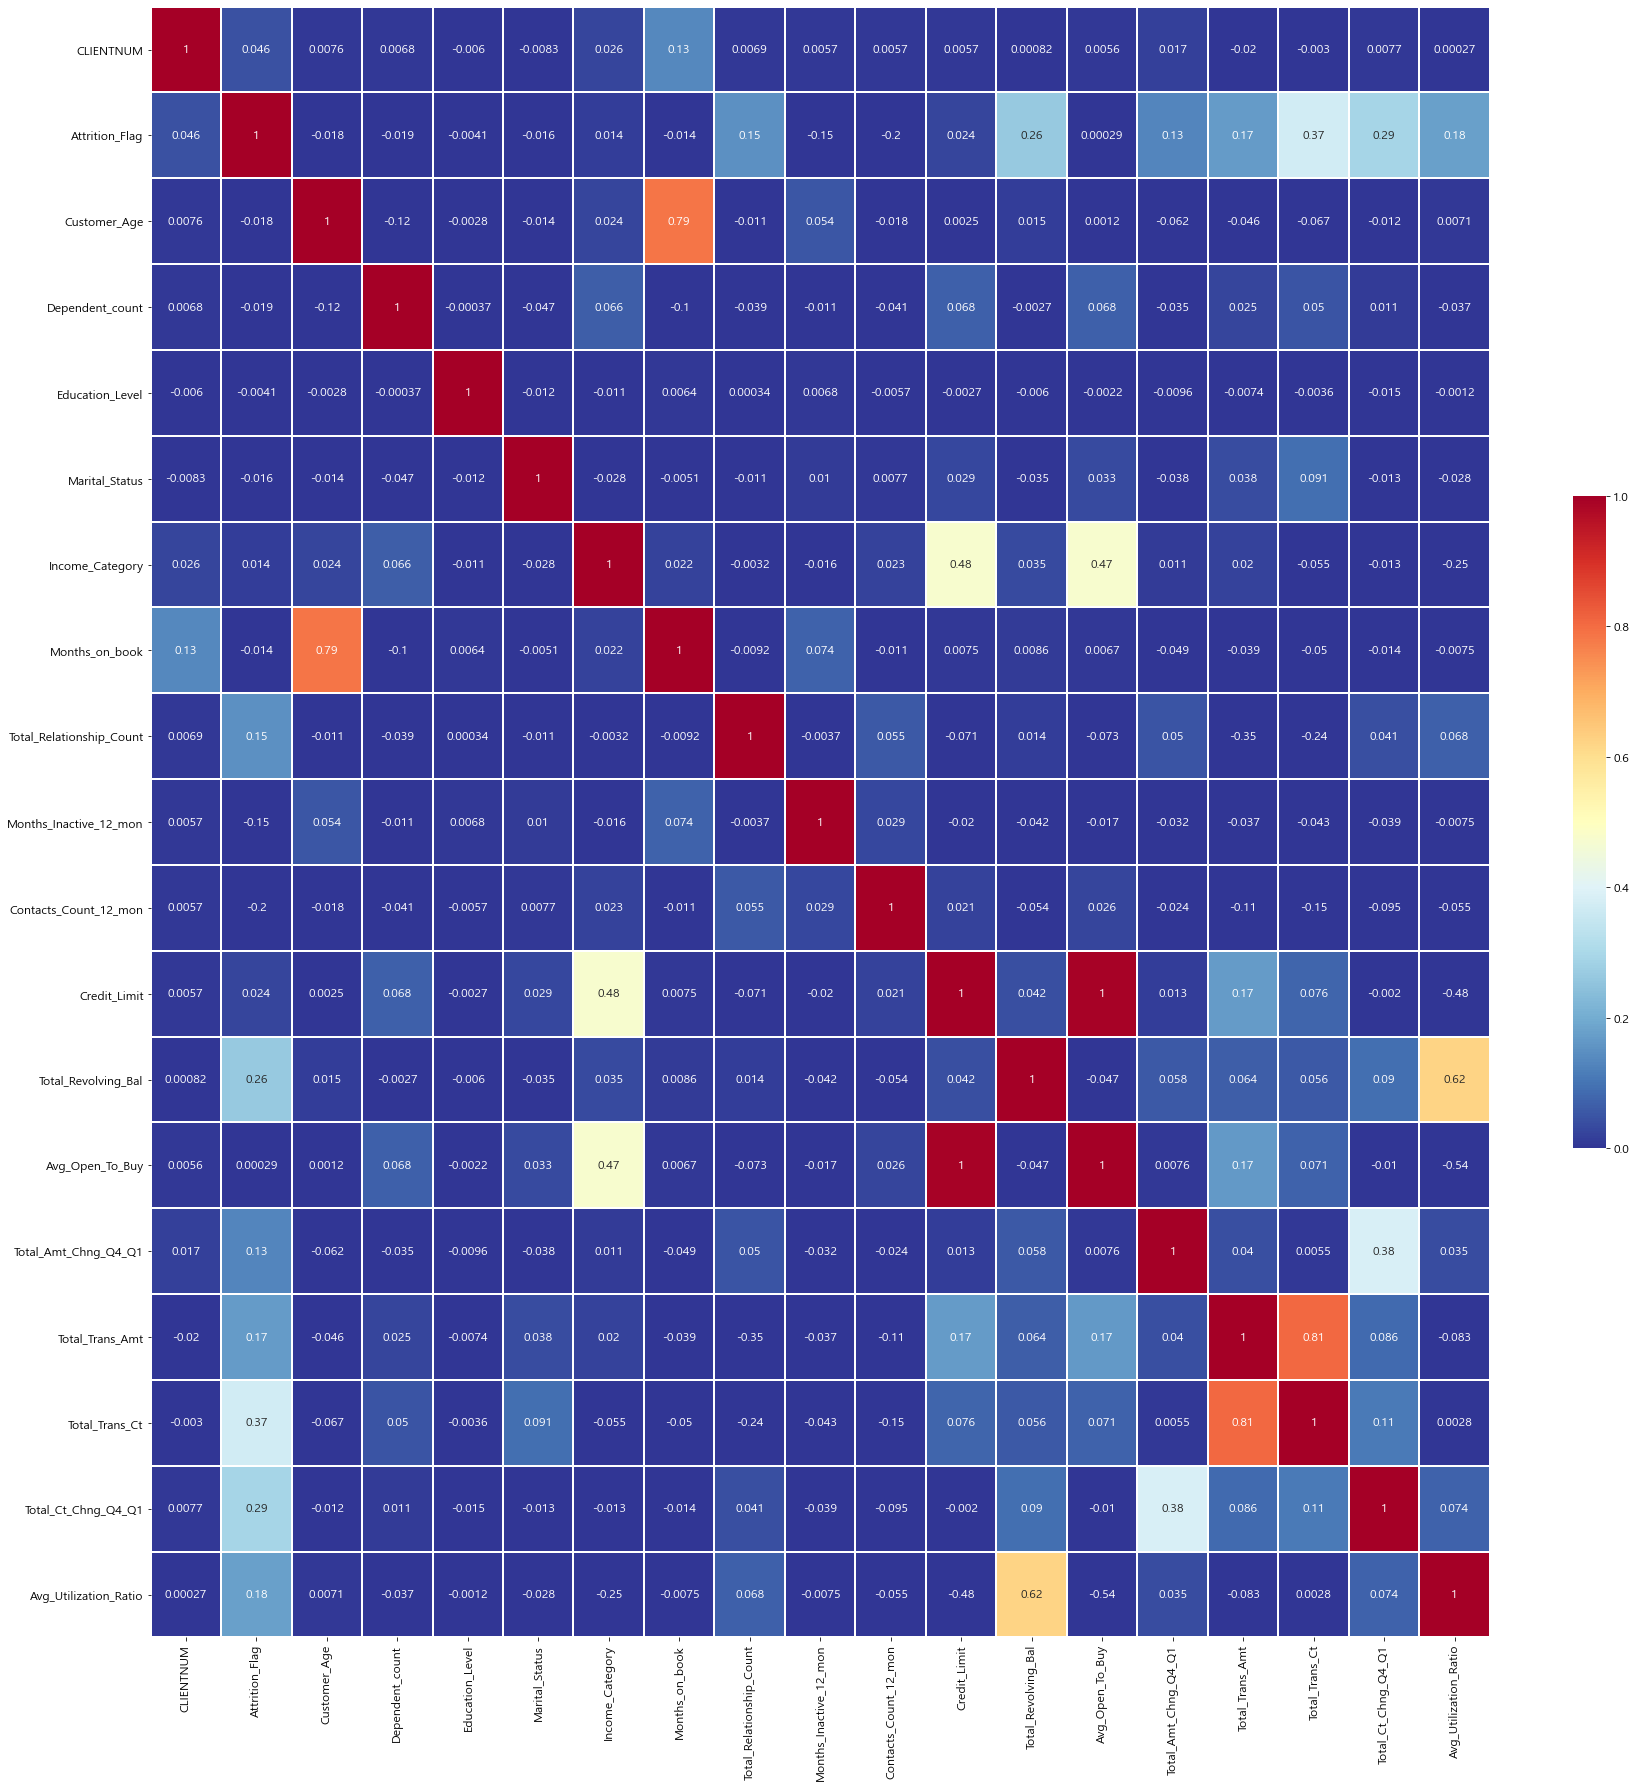

In [192]:
mat = np.zeros_like(df.corr(method = 'pearson'))
plt.figure(figsize=(30,30))
sns.heatmap(df .corr(method = 'pearson'),
            vmin = 0, vmax = +1, 
            annot = True, 
            cmap = 'RdYlBu_r', 
            linewidths=1,
            cbar_kws={"shrink": 0.4},
            mask = mat)

<Figure size 2160x2160 with 0 Axes>

<AxesSubplot:>

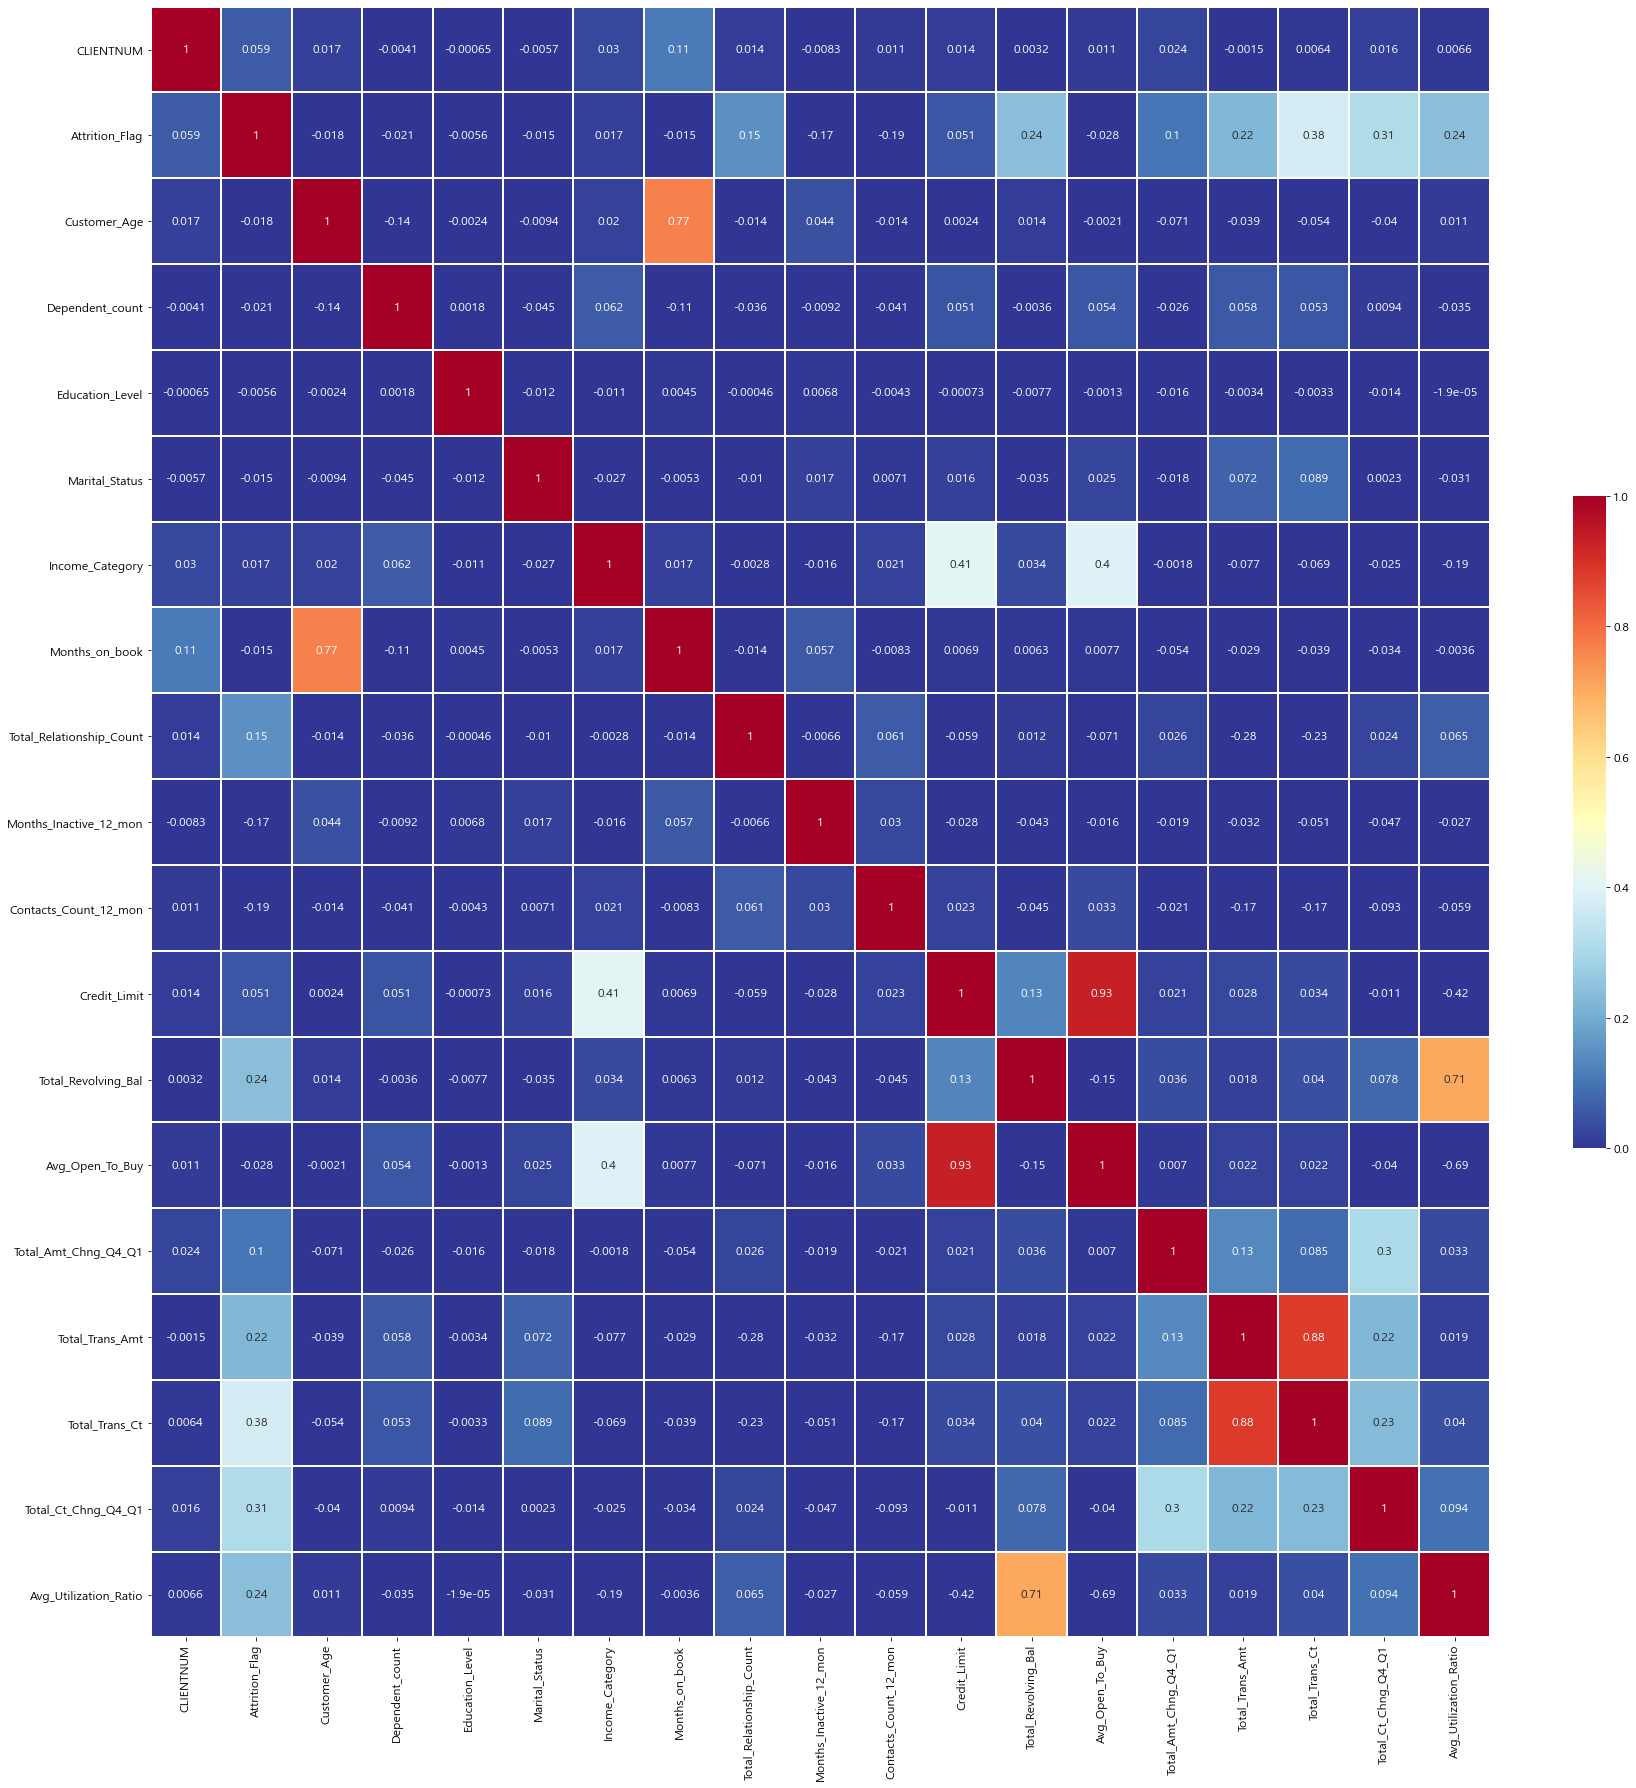

In [193]:
mat = np.zeros_like(df.corr(method = 'spearman'))
plt.figure(figsize=(30,30))
sns.heatmap(df .corr(method = 'spearman'),
            vmin = 0, vmax = +1, 
            annot = True, 
            cmap = 'RdYlBu_r', 
            linewidths=1,
            cbar_kws={"shrink": 0.4},
            mask = mat)

### 더미 처리해서 확인

In [139]:
df_all = df_org.copy()

In [140]:
temp = pd.get_dummies(df_all["Education_Level"])
temp[:5]

,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0


In [141]:
df_all = pd.concat((df_all,temp), axis=1)
df_all

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,42,1.625,0.061,0,0,0,1,0,0,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,33,3.714,0.105,0,0,1,0,0,0,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,20,2.333,0.000,0,0,1,0,0,0,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,20,2.333,0.760,0,0,0,1,0,0,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,28,2.500,0.000,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,117,0.857,0.462,0,0,1,0,0,0,0
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,69,0.683,0.511,0,0,0,0,0,0,1
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,60,0.818,0.000,0,0,0,1,0,0,0
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,62,0.722,0.000,0,0,1,0,0,0,0


In [142]:
temp = pd.get_dummies(df_all["Income_Category"])
temp[:5]

,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown
0,0,0,1,0,0,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [143]:
df_all = pd.concat((df_all,temp), axis=1)
df_all

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,High School,Post-Graduate,Uneducated,Unknown,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,0,0,0,0,0,1,0,0,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,0,0,0,0,0,0,0,0,1,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,0,0,0,0,0,0,1,0,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,0,0,0,0,0,0,0,1,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,0,0,0,0,0,1,0,0,0,0
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,0,0,0,1,0,1,0,0,0,0
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,1,0,0,0,0,0,0,0,1,0
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,0,0,0,0,0,1,0,0,0,0


In [145]:
temp = pd.get_dummies(df_all["Marital_Status"])
temp[:5]


,Divorced,Married,Single,Unknown
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0


In [146]:
df_all = pd.concat((df_all,temp), axis=1)
df_all

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown,Divorced,Married,Single,Unknown
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,0,0,1,0,0,0,0,1,0,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,0,0,0,0,1,0,0,0,1,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,0,0,1,0,0,0,1,0,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,0,0,0,0,1,0,0,0,0,1
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,0,1,0,0,0,0,0,0,1,0
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,0,1,0,0,0,0,1,0,0,0
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,0,0,0,0,1,0,0,1,0,0
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,0,1,0,0,0,0,0,0,0,1


<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

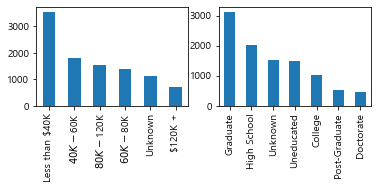

In [147]:
plt.subplot(221)
df_all["Income_Category"].value_counts().plot(kind = 'bar')

plt.subplot(222)
df_all["Education_Level"].value_counts().plot(kind = 'bar')
plt.show()
